In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/ADAPT-VQE/')
print(sys.executable)

/home/azhar04/anaconda3/envs/qiskit-1-2/bin/python


In [104]:
from src.pools import QE
from src.molecules import create_h2, create_h4

from algorithms.s_adapt_vqe import AdaptVQE

r = 0.742
molecule = create_h2(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=30,
                    max_opt_iter=100,
                    verbose=True
                    )

# print(pool)
adapt_vqe.run()

HF State: [1, 1, 0, 0]
N Qubits: 4
Hamiltonian Type: <class 'openfermion.ops.representations.interaction_operator.InteractionOperator'>
Hamiltonian: () 0.7131768341239892
((0, 1), (0, 0)) -1.2521011771187973
((1, 1), (1, 0)) -1.2521011771187973
((2, 1), (2, 0)) -0.4763246662830587
((3, 1), (3, 0)) -0.4763246662830587
((0, 1), (0, 1), (0, 0), (0, 0)) 0.3371871363510416
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09066120278229658
((0, 1), (1, 1), (1, 0), (0, 0)) 0.3371871363510416
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09066120278229658
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09066120278229658
((0, 1), (2, 1), (2, 0), (0, 0)) 0.33168193748206215
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09066120278229658
((0, 1), (3, 1), (3, 0), (0, 0)) 0.33168193748206215
((1, 1), (0, 1), (0, 0), (1, 0)) 0.3371871363510416
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09066120278229658
((1, 1), (1, 1), (1, 0), (1, 0)) 0.3371871363510416
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09066120278229658
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09066120278229

In [138]:
data = adapt_vqe.data

# Access the final ansatz indices and coefficients
print("Evolution of ansatz indices: ", data.evolution.indices)
print(
    "Final operators in the ansatz: ",
    [pool.get_op(index) for index in data.result.ansatz.indices],
)
print("Evolution of ansatz coefficients: ", data.evolution.coefficients)

# Access the number of function evaluations, gradient evaluations, optimizer iterations for each ADAPT-VQE iteration
print("Function evaluations throughout the iterations:", data.evolution.nfevs)
print("Gradient evaluations throughout the iterations:", data.evolution.ngevs)
print("Optimizer iterations throughout the iterations:", data.evolution.nits)

# Create the circuit implementing the final ansatz
qc = pool.get_circuit(data.result.ansatz.indices, data.result.ansatz.coefficients)
print("Final ansatz circuit:\n", qc)

# Access the number of CNOTs and CNOT depth at each iteration
print("Evolution of ansatz CNOT counts: ", data.acc_cnot_counts(pool))
print("Evolution of ansatz CNOT depths: ", data.acc_cnot_depths(pool))

Evolution of ansatz indices:  [[2]]
Final operators in the ansatz:  [-0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]]
Evolution of ansatz coefficients:  [[-0.11319057622198941]]
Function evaluations throughout the iterations: [[5]]
Gradient evaluations throughout the iterations: [[5]]
Optimizer iterations throughout the iterations: [[3]]
Final ansatz circuit:
                ┌───┐      ┌───┐                                »
q_3: ──■───────┤ X ├──────┤ H ├────────────────────────────────»
     ┌─┴─┐┌───┐└─┬─┘      ├───┤                           ┌───┐»
q_2: ┤ X ├┤ X ├──┼────────┤ H ├───────────────────────────┤ X ├»
     └───┘└───┘  │  ┌─────┴───┴─────┐     ┌──────────────┐└─┬─┘»
q_1: ──■─────────■──┤ Ry(-0.028298) ├──■──┤ Ry(0.028298) ├──■──»
     ┌─┴─┐┌───┐┌───┐└───────────────┘┌─┴─┐└──────────────┘     »
q_0: ┤ X ├┤ X ├┤ H ├─────────────────┤ X ├──

In [102]:
print(pool.get_q_op(3))

-0.125j [X0 X1 X2 Y3] +
0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
0.125j [X0 Y1 Y2 Y3] +
-0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
-0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]


Jumlah Iterasi ADAPT-VQE: 1
Initial Energy -1.116651247411522
Initial Energy -1.116651247411522
Final Energy -1.137263338363534


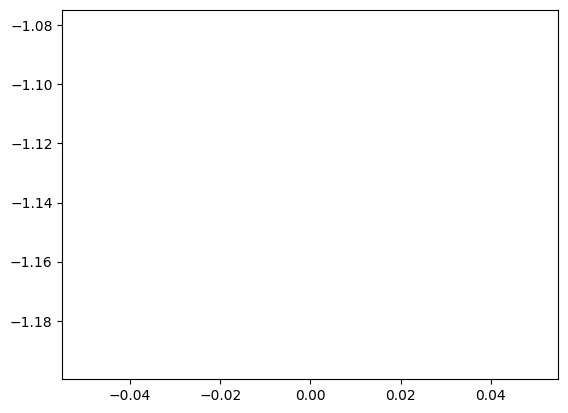

In [110]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
print("Jumlah Iterasi ADAPT-VQE:", data.iteration_counter)

print("Initial Energy", data.initial_energy)
print("Initial Energy", data.evolution.initial_energy)


print("Final Energy", data.evolution.its_data[-1].energy)
plt.plot(data.evolution.energies)

In [111]:
energies = data.evolution.its_data
energies[-1].energy

-1.137263338363534

In [112]:
data.result.ansatz.coefficients

[-0.11319057622198941]

In [113]:
data.result.ansatz.indices

[2]

In [78]:
print(zip(data.result.ansatz.indices, data.result.ansatz.coefficients))

In [119]:
print(pool.operators[2])

-0.125j [X0 X1 X2 Y3] +
-0.125j [X0 X1 Y2 X3] +
0.125j [X0 Y1 X2 X3] +
-0.125j [X0 Y1 Y2 Y3] +
0.125j [Y0 X1 X2 X3] +
-0.125j [Y0 X1 Y2 Y3] +
0.125j [Y0 Y1 X2 Y3] +
0.125j [Y0 Y1 Y2 X3]


In [122]:
from qiskit import QuantumCircuit

indices = data.result.ansatz.indices
coefficients = data.result.ansatz.coefficients

circuit = QuantumCircuit(data.n)

for i, (index, coefficient) in enumerate(zip(indices, coefficients)):
    # print(index)
    # print(coefficient)
    operator = pool.operators[index]
    source_orbs = operator.source_orbs
    target_orbs = operator.target_orbs
    print(source_orbs)
    print(target_orbs)
    print('')
    

[2, 3]
[0, 1]



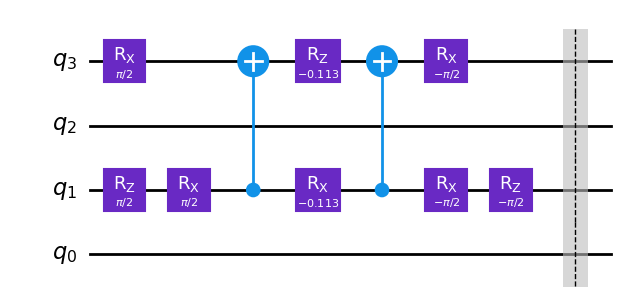

In [144]:
qc = pool.get_circuit([0], data.result.ansatz.coefficients)
qc.draw(reverse_bits=True)

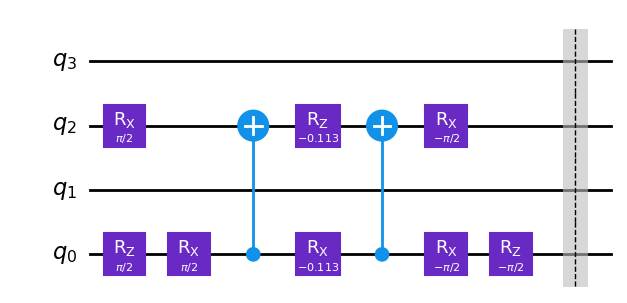

In [143]:
qc = pool.get_circuit([1], data.result.ansatz.coefficients)
qc.draw(reverse_bits=True)

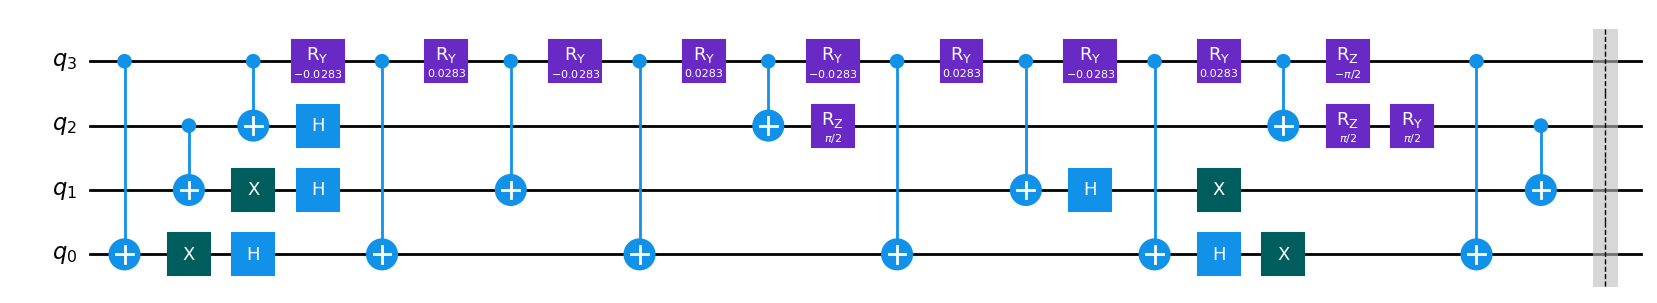

In [132]:
qc = pool.get_circuit([3], data.result.ansatz.coefficients*21)
qc.draw(reverse_bits=True)

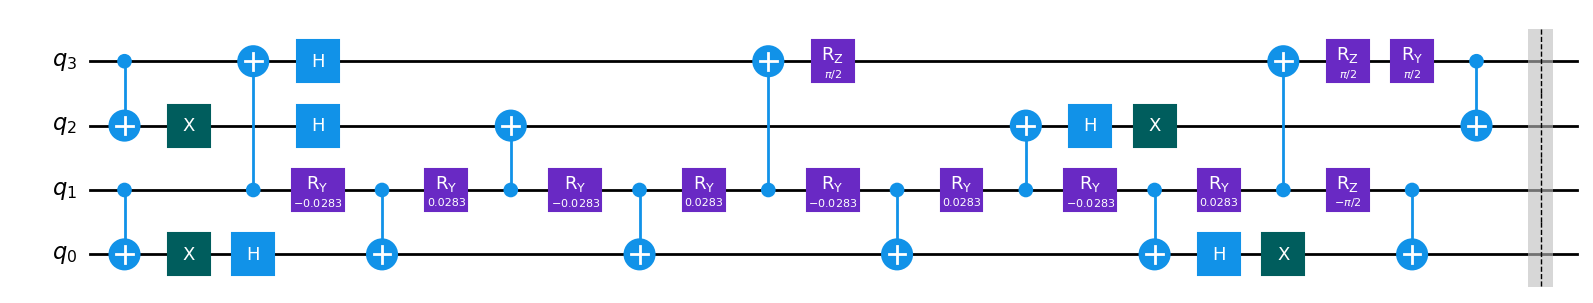

In [145]:
qc = pool.get_circuit(data.result.ansatz.indices, data.result.ansatz.coefficients*21)
qc.draw(reverse_bits=True)